For reference on LaTeX: https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

# Chapter 4: Evolutionary Games

## 4.5 Replicator Dynamics
### 4.5.1 Two Strategies
On page 57,

In the interior, there can be at most one isolated fixed point. Such a fixed point exists 
if $(a_{11}-a_{21})(a_{12}-a_{22})<0$ .

Show the above statement (that is, such a fixed point exists if $(a-c)(b-d)<0$) is true in terms of the following equation (given in eq 4.5 on page 50)
$$ \dot{x} = x(1-x)[(a-b-c+d)x+b-d] $$



**Your proof here**

.
.
.


### 4.5.2 Three Strategies

Reproduce three trajectories in the paper-rock-scissors simplex (Figure 4.6, page 59).

module loaded


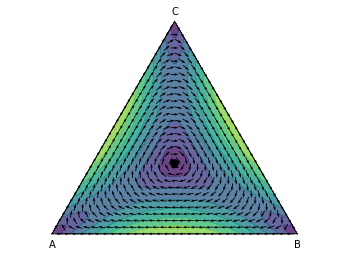

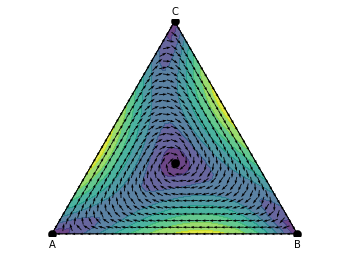

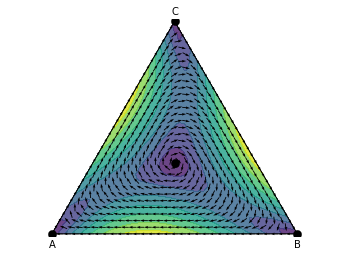

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from vendor import egtsimplex

#define function of x=[x0,x1,x2] and t to plot dynamics on simplex
def f_version_1(x, t):
    global A
    phi = x.dot(A.dot(x))
    x0dot = x[0]*(A.dot(x)[0]-phi)
    x1dot = x[1]*(A.dot(x)[1]-phi)
    x2dot = x[2]*(A.dot(x)[2]-phi)
    return [x0dot,x1dot,x2dot]

def f(x, t): # a vectorized way
    global A
    phi = x.dot(A.dot(x))
    return x*(A.dot(x)-phi)


As = [np.array([[0,1,-1], [-1,0,1], [1,-1,0]]),
      np.array([[0,3,-1], [-1,0,3], [3,-1,0]]),
      np.array([[0,1,-3], [-3,0,1], [1,-3,0]]) ]

for i in range(3):
    A = As[i] # A is a global variable
    dynamics = egtsimplex.simplex_dynamics(f)
    
    fig, ax = plt.subplots()
    dynamics.plot_simplex(ax)

### 4.5.2 Three Strategies

on Page 59

The general rock-paper-scissors game is given by the payoff matrix
$$ A = \begin{bmatrix} 0 & -a_2 & b_3 \\ b_1 & 0 & -a_3 \\ -a_1 & b_2 & 0 \end{bmatrix} $$

Show:

(i) if the determinant of A is positive (that is, $a_1a_2a_3<b_1b_2b_3$,
then there exists a unique interior equilibrium that is globally stable.

(ii) if the determinant of A is negative (that is, $a_1a_2a_3>b_1b_2b_3$,
then there exists a unique interior equilibrium that is unstable.


**Your proof here**

.
.
.


## 4.9 Game Theory and Ecology
### 4.9.1 Predator and Prey
On page 65, eq (4.33)

$$ \dot{x} = x(a-by) \\
\dot{y} = y(-c+dx)
$$

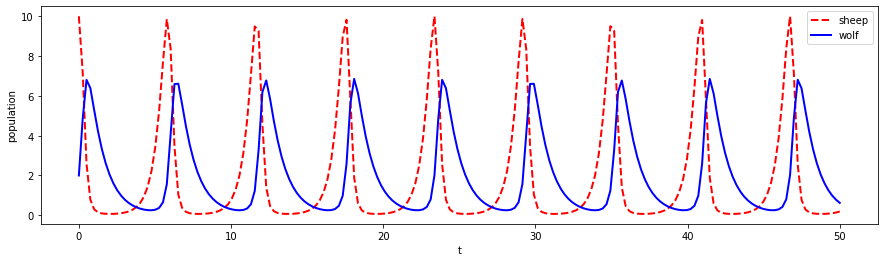

In [2]:
# plot the dynamics of the above equation

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.integrate import odeint  # Ordinary Differential Equation

a, b, c, d = 2, 1, 1, .5

def f(xy, t):
    x = xy[0]
    y = xy[1]
    dx = x*(a-b*y)
    dy = y*(-c+d*x)
    return [dx, dy]

t = np.linspace(0, 50, 200)
xy_init = [10, 2]

xy_hist = odeint(f, xy_init, t)

plt.figure(figsize=(15, 4))

plt.plot(t, xy_hist[:,0],'r--', linewidth=2.0)
plt.plot(t, xy_hist[:,1],'b-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("population")
plt.legend(["sheep", "wolf"])